# Exercise 3: Grouping and Masking

## Aim: Work with data which has been grouped and create masks for data.

### Issues Covered:
- Grouping data with `.groupby()`
- Applying functions to data with `.apply()`
- Create masks using `.where()` 

## 1. GroupBy processing

1. Group the temperature data by latitude, look at the results.

In [1]:
import xarray as xr
import numpy as np

ds = xr.open_dataset('../data/xbhubo.pgc0apr.nc')
temperature = ds["temp"]
temperature.groupby('latitude')

DataArrayGroupBy, grouped over 'latitude'
144 groups with labels -89.38, -88.12, ..., 88.12, 89.38.

2. Create a function to calculate the mean. Apply this function across the data grouped by time and plot.

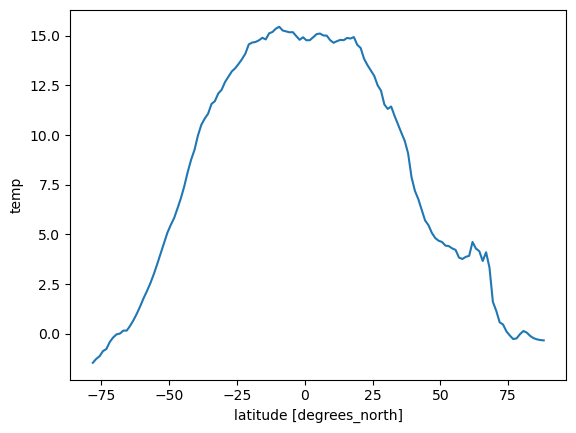

In [2]:
def mean(x):
    return x.mean()

temperature.groupby('latitude').apply(mean).plot()

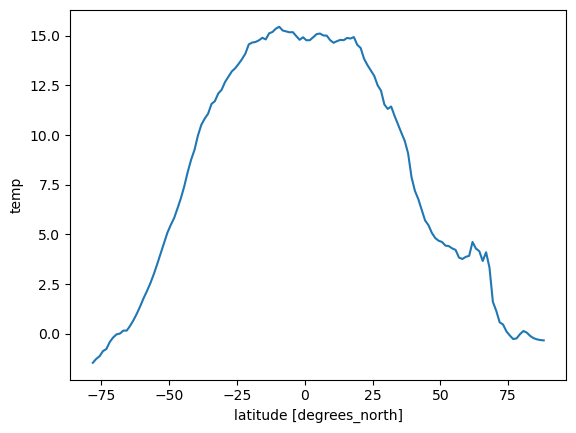

In [3]:
# You can also do this:
temperature.groupby('latitude').apply(np.mean).plot()

5. Plot the maximum temperature across the data grouped by latitude.

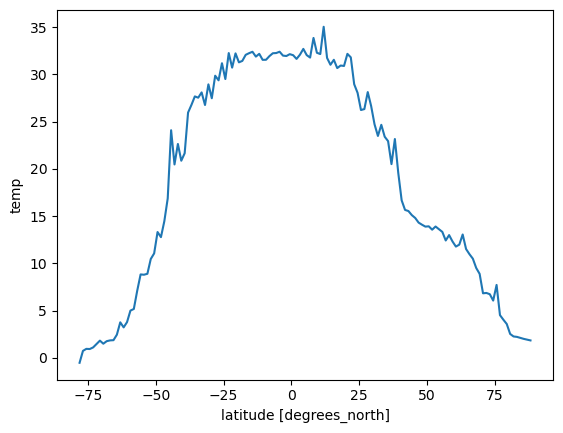

In [4]:
# Why is this not right?
# temperature.groupby('time').max().plot()
def max(x):
    return x.max()

temperature.groupby('latitude').apply(max).plot()

6. Plot the minimum temperature across the data grouped by latitude.

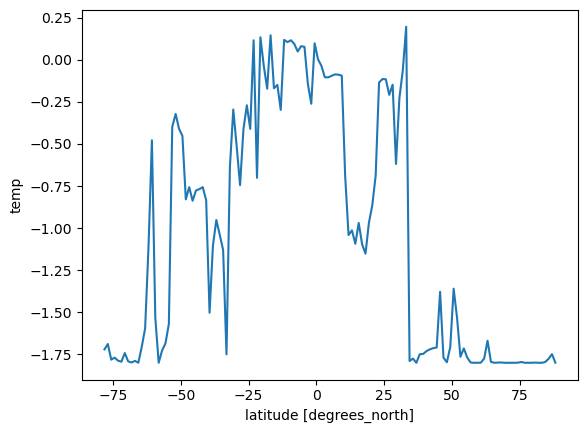

In [5]:
# Why does this not work:
# temperature.groupby('time').min().plot()
def min(x):
    return x.min()

temperature.groupby('latitude').apply(min).plot()

7. Let's have a look at the seasonal variations in temperature data. Create a dataset which is grouped by the months january and february, and a second dataset for june/jul/aug. Apply the mean on both of these over the time dimension. Find the range by subracting the winter months from the summer months. Plot the range.

In [6]:
grouped_by_seasons = temperature.groupby('time.season').mean('time')
temp_range = grouped_by_seasons.sel(season='JJA') - grouped_by_seasons.sel(season='DJF')
temp_range.plot()

KeyError: 'time'

## 2. Masking

1. Determine which grid cells have a temperature difference greater than 1.0 on the 30th June 2065. Plot the results.

In [ ]:
ds.sel(time='2065-06-30')['tas'].where(ds.tas > 1.0).plot()

2. Plot the sst field to take a look what the land surfaces currently look like.

In [ ]:
ds.tas.isel(time=0).plot()

In [ ]:
ds

3. Build a mask over the land aread using the numpy library to help. We'll be going over numpy later in the course.

In [ ]:
# This doesn't work with this dataset :/

# import numpy as np
# mask_ocean = 2 * np.ones((ds.dims['lat'], ds.dims['lon'])) * np.isfinite(ds.tas.isel(time=0))
# mask_land = 1 * np.ones((ds.dims['lat'], ds.dims['lon'])) * np.isnan(ds.tas.isel(time=0))
# mask_array = mask_ocean + mask_land
# mask_array.plot()

4. Add the mask to the coordinates data array. Take a look at the data array to check it's been added.

In [ ]:
# Doesn't work with this dataset

# ds.coords['mask'] = (('lat', 'lon'), mask_array)
# ds

5. Apply the mask from the data array using where and integrate with the mean.

In [ ]:
# Doesn't work with this dataset
# ds['tas'].mean('time').where(ds.mask == 1).plot()

6. Extension question: Using the air temperature dataset, calculate the mean annual difference in SST (sea surface temperature) and tas?

In [ ]:
# Not sure how to do this?